# The Sparks Foundation - Data Science & Business Analytics Internship


## GRIP @ The Sparks Foundation

## By : Ziad Mohamed Shamndy 

### Task2 :Prediction using Unsupervised ML

***

### 1-Import Libararies 

In [1]:
import numpy as np  #linear algebra
import pandas as pd # data processing

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

### 2-Import dataset

In [2]:
df=pd.read_csv(r'D:\Class 2020\Datasets\Iris.csv')

### 3-Exploratory data analysis

- we have imported the data.
- now, its time to explore the data to dain insights about it.

#### preview the dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### view dimention of dataset 

In [4]:
df.shape

(150, 6)

now , we can sea that there are 150 row and 6 column in dataset

#### view columns name 

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

we can see that some of columns are less importand than others such as: id So, we should drop it as follow

#### drop id variable

In [6]:
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking For datatypes of the attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**comment**

   - we can see that that the dataset contains mixture of categorical and numerical variables.
   - Numerical variable have data type : float64
   - Categorical variable have data type : object

#### View statistical properties of dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


#### check for missing value

In [9]:
dict={}
for i in list(df.columns):
    dict[i]=df[i].isnull().sum()
pd.DataFrame(dict,index=['number of null values']).transpose() 

,number of null values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


***

## ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤData Visualization

## Pie Plot

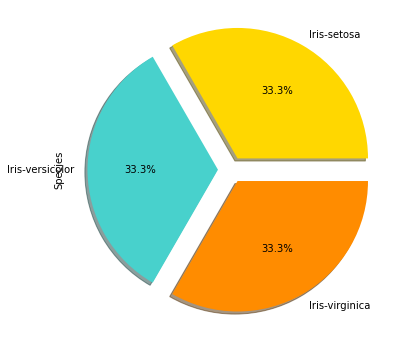

In [10]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(6,6),colors=colors);

## Tree chart

In [11]:
import squarify
# in this case we must classification by species 
tree_data=df.groupby('Species').size().reset_index(name='counts')
tree_data

,Species,counts
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


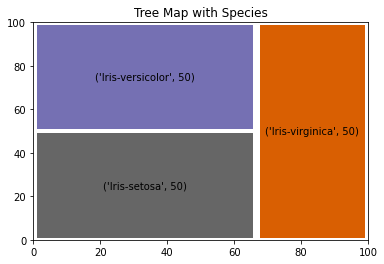

In [30]:
# should convert dataframe to list
sizes=tree_data.counts.to_list()
np.random.seed(seed=12345)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(tree_data.Species,tree_data.counts))
squarify.plot(sizes=sizes,color=color,label=label,pad=True)
plt.title('Tree Map with Species')
# Show the plot
plt.show()

## Sub Plots

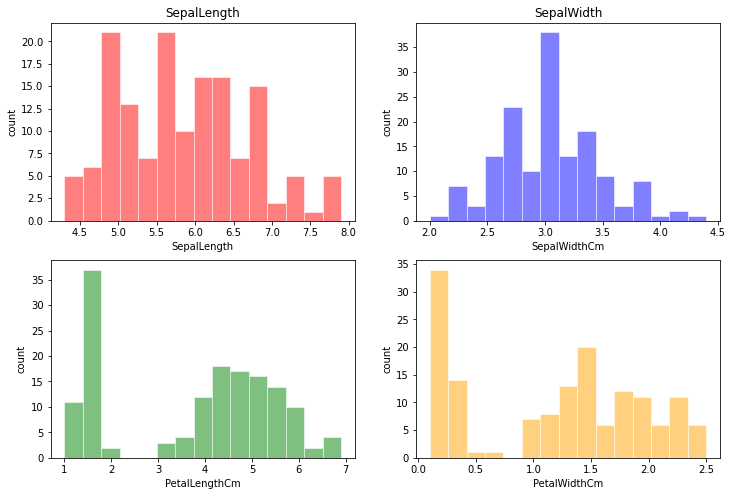

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
axes[0,0].hist('SepalLengthCm',bins=15,color='red',alpha=.5,edgecolor='white',data=df)
axes[0,0].set_title('SepalLength')
axes[0,0].set_xlabel('SepalLength')
axes[0,0].set_ylabel('count')

axes[0,1].hist('SepalWidthCm',bins=15,color='blue',alpha=.5,edgecolor='white',data=df)
axes[0,1].set_title('SepalWidth')
axes[0,1].set_xlabel('SepalWidthCm')
axes[0,1].set_ylabel('count')

axes[1,0].hist('PetalLengthCm',bins=15,color='green',alpha=.5,edgecolor='white',data=df)
#axes[1,0].set_title('PetalLength')
axes[1,0].set_xlabel('PetalLengthCm')
axes[1,0].set_ylabel('count')

axes[1,1].hist('PetalWidthCm',bins=15,color='orange',alpha=.5,edgecolor='white',data=df)
#axes[1,1].set_title('PetalWidth')
axes[1,1].set_xlabel('PetalWidthCm')
axes[1,1].set_ylabel('count')

plt.show()


***

# ㅤ           ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ          ㅤㅤ          Model Building

Now, we will build classification models for the Iris dataset. First I'll  show the Supervised Models and then one Unsupervised Model called KNN Clustering.

**Supervised Models**

📌 **Logistic Regression**: Regression for Classification

📌 **K-Nearest Neighbors**: Uses the concept of nearest neighbors

📌 **Random Forest Classifier**: Gets a cumulative vote of a number of decision trees

📌 **XGBoost Classifier**: Optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. Provides a parallel tree boosting.

**Unsupervised Model**

📌 **KNN Clustering**

### Supervised Models

📌 First we'll split the data using **scikit-learn's train_test_split library**.

📌 I'll also be using cross_val_score which just like train_test_split to get cross-validation score for better idea about our model.

In [14]:
x=df.drop('Species',axis=1)
y=df.Species

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(lr, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.04


 **we can sea that accuracy with logistic Regression : 94 %**

***

### KNN

In [17]:
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(knn, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.05


 **we can sea that accuracy with KNN : 96 %**

***

### Random Forest Classifier

In [18]:
rfc = RandomForestClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(rfc, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.93 accuracy with a standard deviation of 0.03


**we can sea that accuracy with Random Forest Classifier : 93 %**

### XGBoost Classifier

In [19]:
xgb = XGBClassifier(verbosity=0)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(xgb, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.03


**we can sea that accuracy with XGBoost Classifier : 94 %**

***

**Conclusion from supervised Learning** 
 - The accuracy with **logistic Regression** : 94 %
 - The accuracy with **KNN** : 96 %
 - The accuracy with **Random Forest Classifier** : 93 %
 - The accuracy with **XGBoost Classifier** : 94 %

## Unsupervised Learning 

### KNN Clustering

📌 LabelEncoder can be used to encode categorical values to numerical values as all the Machine Learning models understand only numerical values.

In [21]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

now , we converted Spacies variable from Categorecal to Numerical Data 

📌 Now, in order to measure the accuracy of **KNN Clustering** we cannot use the traditional accuracy measures. Here, we use one of the measure Inertia to assess the accuracy of a clustering model. Lower the Inertia, the better the model.

In [24]:
val = df.iloc[:, [0, 1, 2, 3]].values

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(val)
    inertia.append(kmeans.inertia_)

📌 Let's follow the same method like **KNN Classification** for checking the best value.

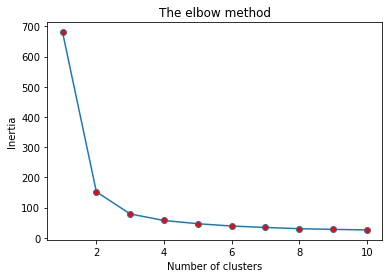

In [25]:
plt.plot(range(1, 11), inertia, marker='o', mfc='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

📌 Well the best is 3. We also need only 3 clusters as we have 3 types of target variables.

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(val)
labels = y_kmeans.predict(val)

In [27]:
def display_cluster(X,km,num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plt.figure(figsize=[10, 8])
    for i in range(num_clusters):
        plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=150, label=labels[i])
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = 'black', marker = 'o', s = 200)
    plt.legend()

## Plotting Clusters

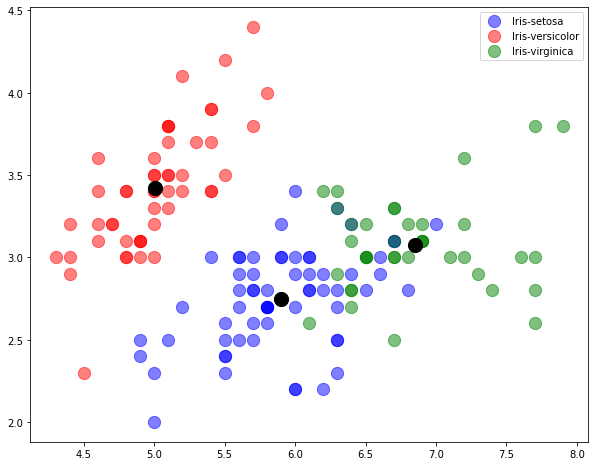

In [28]:
display_cluster(X=val, km=kmeans, num_clusters=3)